In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [43]:
df = pd.read_csv("data.csv",parse_dates = True)


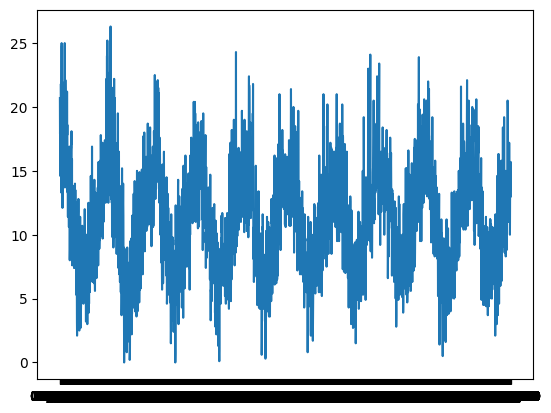

In [45]:
plt.plot(df['Date'],df['temp'])

In [50]:
from statsmodels.tsa.stattools import adfuller 

dftest = adfuller(df['temp'],autolag = 'AIC')
dftest
# small p-value

(-4.444804924611694,
 0.0002470826300361039,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

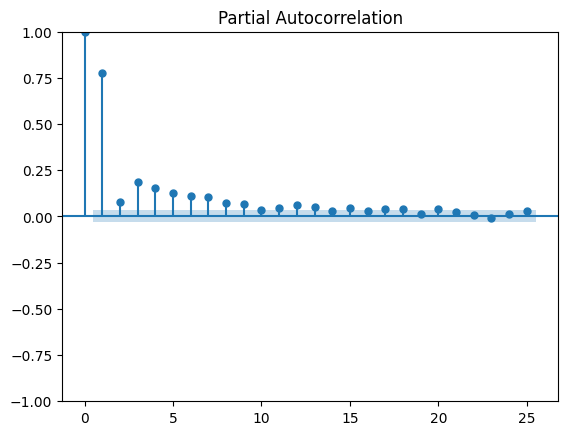

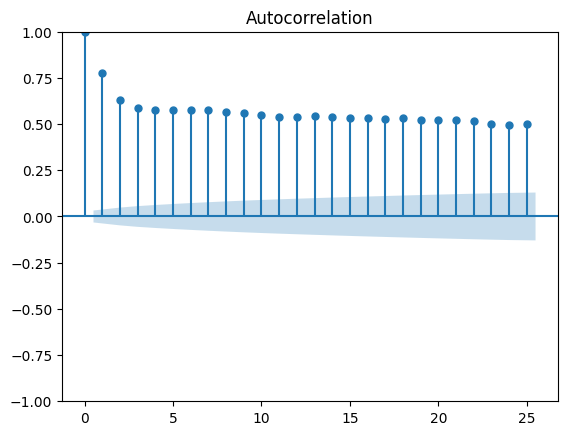

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['temp'],lags = 25)
acf = plot_acf(df['temp'],lags = 25)

In [56]:
X = df['temp']

In [57]:
train= X[:len(X)-7]
test= X[len(X)-7:]

In [58]:
 train

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: temp, Length: 3643, dtype: float64

In [59]:
test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: temp, dtype: float64

In [71]:
model = AutoReg(train,lags = 10).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   temp   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Thu, 27 Jun 2024   AIC                          16775.028
Time:                        03:02:32   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
temp.L1        0.6103      0.017     36.795      0.000       0.578       0.643
temp.L2       -0.0832      0.019     -4.289      0.000      -0.121      -0.045
temp.L3        0.0631      0.019      3.246      0.001       0.025       0.101
temp.L4        0.0512      0.019      2.632      0.008       0.013       0.089
temp.L5        0.0547      0.019      2.810      0.005       0.017       0.093
temp.L6        0.0422      0.019      2.166      0.030       0.004       0.080
temp.L7        0.0590      0.019      3.032      0.002       0.021       0.097
temp.L8        0.0324      0.019      1.664      0.096      -0.006       0.070
temp.L9        0.0502      0.019      2.585      0.010       0.012       0.088
temp.L10       0.0360      0.017      2.175      0.030       0.004       0.069
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0275           -0.0000j            1.0275           -0.0000
AR.2             0.9811           -0.7934j            1.2617           -0.1082
AR.3             0.9811           +0.7934j            1.2617            0.1082
AR.4             0.4192           -1.3007j            1.3665           -0.2004
AR.5             0.4192           +1.3007j            1.3665            0.2004
AR.6            -0.4338           -1.3906j            1.4567           -0.2981
AR.7            -0.4338           +1.3906j            1.4567            0.2981
AR.8            -1.3012           -0.8676j            1.5639           -0.4064
AR.9            -1.3012           +0.8676j            1.5639            0.4064
AR.10           -1.7501           -0.0000j            1.7501           -0.5000
------------------------------------------------------------------------------
"""

In [76]:
pred  = model.predict(start = len(train),end = len(X)-1,dynamic = False)

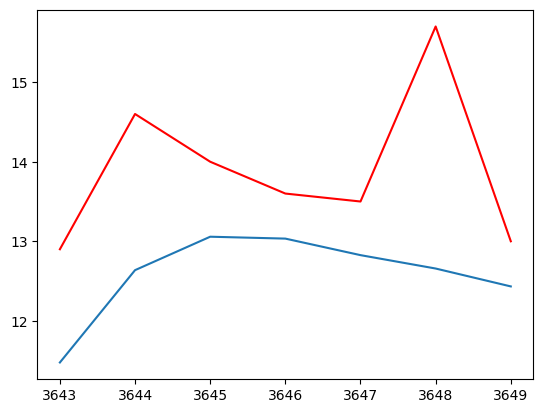

In [77]:
plt.plot(pred)
plt.plot(test,color = 'red')

In [78]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))

In [79]:
rmse

1.5638196220860467